# Praktikum PCD 7 - Filter Batas

Import Library

In [32]:
import matplotlib.pyplot as plt  # Mengimport modul matplotlib untuk visualisasi data

# Mengaktifkan mode inline agar plot ditampilkan di dalam notebook
%matplotlib inline 

from skimage import data  # Mengimport modul data dari skimage untuk mengakses dataset
from skimage.io import imread  # Mengimport fungsi imread dari skimage.io untuk membaca gambar
from skimage.color import rgb2gray  # Mengimport fungsi rgb2gray dari skimage.color untuk konversi ke citra grayscale

import numpy as np  # Mengimport modul numpy untuk operasi numerik dengan array


Load & Plot Input Image

Shape citra 1 :  (636, 512)
Shape citra 1 :  (312, 250)


Text(0.5, 1.0, 'Citra 2')

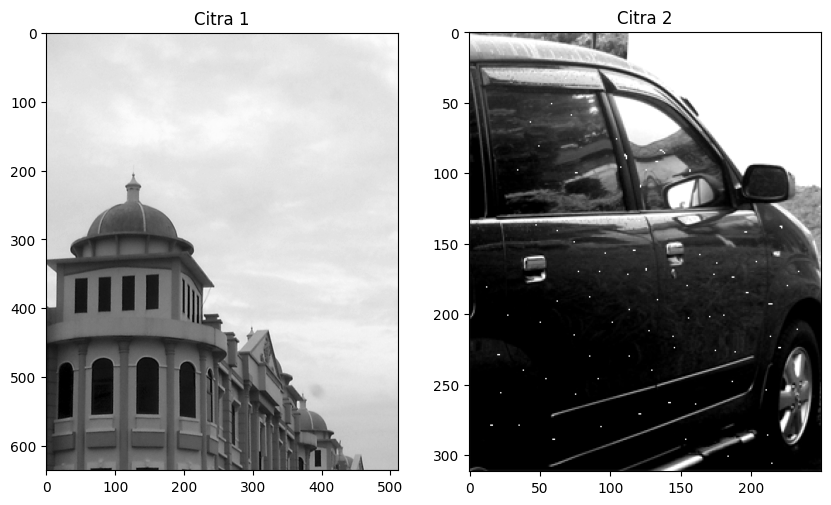

In [33]:
citra1 = imread(fname="gedung.tif")  # Membaca citra dengan nama file "gedung.tif" dan menyimpannya dalam variabel citra1
citra2 = imread(fname="mobil.tif")  # Membaca citra dengan nama file "gedung.tif" dan menyimpannya dalam variabel citra2

print('Shape citra 1 : ', citra1.shape)  # Menampilkan bentuk (shape) citra1
print('Shape citra 1 : ', citra2.shape)  # Menampilkan bentuk (shape) citra2

fig, axes = plt.subplots(1, 2, figsize=(10, 10))  # Membuat subplot dengan ukuran 1x2 dan ukuran gambar total 10x10
ax = axes.ravel()  # Melakukan perataan (flattening) pada array axes

ax[0].imshow(citra1, cmap='gray')  # Menampilkan citra1 pada subplot 0 dengan menggunakan colormap 'gray'
ax[0].set_title("Citra 1")  # Mengatur judul subplot 0
ax[1].imshow(citra2, cmap='gray')  # Menampilkan citra2 pada subplot 1 dengan menggunakan colormap 'gray'
ax[1].set_title("Citra 2")  # Mengatur judul subplot 1


Code Asal Matlab

In [34]:
#for baris=2 : tinggi-1
#    for kolom=2 : lebar-1
#        minPiksel = min([F(baris-1, kolom-1) F(baris-1, kolom) F(baris, kolom+1) ...
#            F(baris, kolom-1) F(baris, kolom+1) F(baris+1, kolom-1)  ...
#            F(baris+1, kolom) F(baris+1, kolom+1)]);
#        
#        maksPiksel = max([F(baris-1, kolom-1) F(baris-1, kolom) F(baris, kolom+1)    ...
#            F(baris, kolom-1) F(baris, kolom+1) F(baris+1, kolom-1)  ...
#            F(baris+1, kolom) F(baris+1, kolom+1)]);    
#            
#        if F(baris, kolom) < minPiksel
#           G(baris, kolom) = minPiksel;
#        else
#            if F(baris, kolom) > maksPiksel
#                G(baris, kolom) = maksPiksel;
#            else
#                G(baris, kolom) = F(baris, kolom);
#            end
#        end    
#    end
#end

Menyiapkan variable output

In [35]:
copyCitra1 = citra1.copy()  # Membuat salinan citra1 dan menyimpannya dalam variabel copyCitra1
copyCitra2 = citra2.copy()  # Membuat salinan citra2 dan menyimpannya dalam variabel copyCitra2

m1, n1 = copyCitra1.shape  # Mendapatkan ukuran baris dan kolom dari copyCitra1
output1 = np.empty([m1, n1])  # Membuat array kosong dengan ukuran yang sama dengan copyCitra1

m2, n2 = copyCitra2.shape  # Mendapatkan ukuran baris dan kolom dari copyCitra2
output2 = np.empty([m2, n2])  # Membuat array kosong dengan ukuran yang sama dengan copyCitra2

print('Shape copy citra 1 : ', copyCitra1.shape)  # Menampilkan bentuk (shape) dari copyCitra1
print('Shape output citra 1 : ', output1.shape)  # Menampilkan bentuk (shape) dari output1

print('m1 : ', m1)  # Menampilkan nilai m1
print('n1 : ', n1)  # Menampilkan nilai n1
print()

print('Shape copy citra 2 : ', copyCitra2.shape)  # Menampilkan bentuk (shape) dari copyCitra2
print('Shape output citra 3 : ', output2.shape)  # Menampilkan bentuk (shape) dari output2
print('m2 : ', m2)  # Menampilkan nilai m2
print('n2 : ', n2)  # Menampilkan nilai n2
print()


Shape copy citra 1 :  (636, 512)
Shape output citra 1 :  (636, 512)
m1 :  636
n1 :  512

Shape copy citra 2 :  (312, 250)
Shape output citra 3 :  (312, 250)
m2 :  312
n2 :  250



Proses Filter Batas Pada Citra Input 1

In [36]:
for baris in range(0, m1-1):  # Melakukan iterasi untuk setiap baris dalam rentang 0 hingga m1-1 pada copyCitra1
    for kolom in range(0, n1-1):  # Melakukan iterasi untuk setiap kolom dalam rentang 0 hingga n1-1 pada copyCitra1

        a1 = baris  # Mengassign nilai baris ke variabel a1
        b1 = kolom  # Mengassign nilai kolom ke variabel b1

        arr = np.array([copyCitra1[a1-1, b1-1], copyCitra1[a1-1, b1], copyCitra1[a1, b1+1], \
            copyCitra1[a1, b1-1], copyCitra1[a1, b1+1], copyCitra1[a1+1, b1-1],  \
            copyCitra1[a1+1, b1], copyCitra1[a1+1, b1+1]])  # Membuat array yang berisi piksel sekitar dari copyCitra1

        minPiksel = np.amin(arr)  # Mengambil nilai piksel minimum dari array arr
        maksPiksel = np.amax(arr)  # Mengambil nilai piksel maksimum dari array arr

        if copyCitra1[baris, kolom] < minPiksel:  # Jika nilai piksel pada copyCitra1 lebih kecil dari minPiksel
            output1[baris, kolom] = minPiksel  # Assign nilai minPiksel ke output1 pada baris dan kolom tersebut
        else:
            if copyCitra1[baris, kolom] > maksPiksel:  # Jika nilai piksel pada copyCitra1 lebih besar dari maksPiksel
                output1[baris, kolom] = maksPiksel  # Assign nilai maksPiksel ke output1 pada baris dan kolom tersebut
            else:
                output1[baris, kolom] = copyCitra1[baris, kolom]  # Assign nilai piksel copyCitra1 ke output1 pada baris dan kolom tersebut


Proses Filter Batas Pada Citra Input 2

In [37]:
for baris in range(0, m1-1):  # Melakukan iterasi untuk setiap baris dalam rentang 0 hingga m1-1 pada copyCitra1
    for kolom in range(0, n1-1):  # Melakukan iterasi untuk setiap kolom dalam rentang 0 hingga n1-1 pada copyCitra1

        a1 = baris  # Mengassign nilai baris ke variabel a1
        b1 = kolom  # Mengassign nilai kolom ke variabel b1

        arr = np.array([copyCitra1[a1-1, b1-1], copyCitra1[a1-1, b1], copyCitra1[a1, b1+1], \
            copyCitra1[a1, b1-1], copyCitra1[a1, b1+1], copyCitra1[a1+1, b1-1],  \
            copyCitra1[a1+1, b1], copyCitra1[a1+1, b1+1]])  # Membuat array yang berisi piksel sekitar dari copyCitra1

        minPiksel = np.amin(arr)  # Mengambil nilai piksel minimum dari array arr
        maksPiksel = np.amax(arr)  # Mengambil nilai piksel maksimum dari array arr

        if copyCitra1[baris, kolom] < minPiksel:  # Jika nilai piksel pada copyCitra1 lebih kecil dari minPiksel
            output1[baris, kolom] = minPiksel  # Assign nilai minPiksel ke output1 pada baris dan kolom tersebut
        else:
            if copyCitra1[baris, kolom] > maksPiksel:  # Jika nilai piksel pada copyCitra1 lebih besar dari maksPiksel
                output1[baris, kolom] = maksPiksel  # Assign nilai maksPiksel ke output1 pada baris dan kolom tersebut
            else:
                output1[baris, kolom] = copyCitra1[baris, kolom]  # Assign nilai piksel copyCitra1 ke output1 pada baris dan kolom tersebut


Plot Citra Input dan Output Hasil dari Filter Batas

Text(0.5, 1.0, 'Output Citra 2')

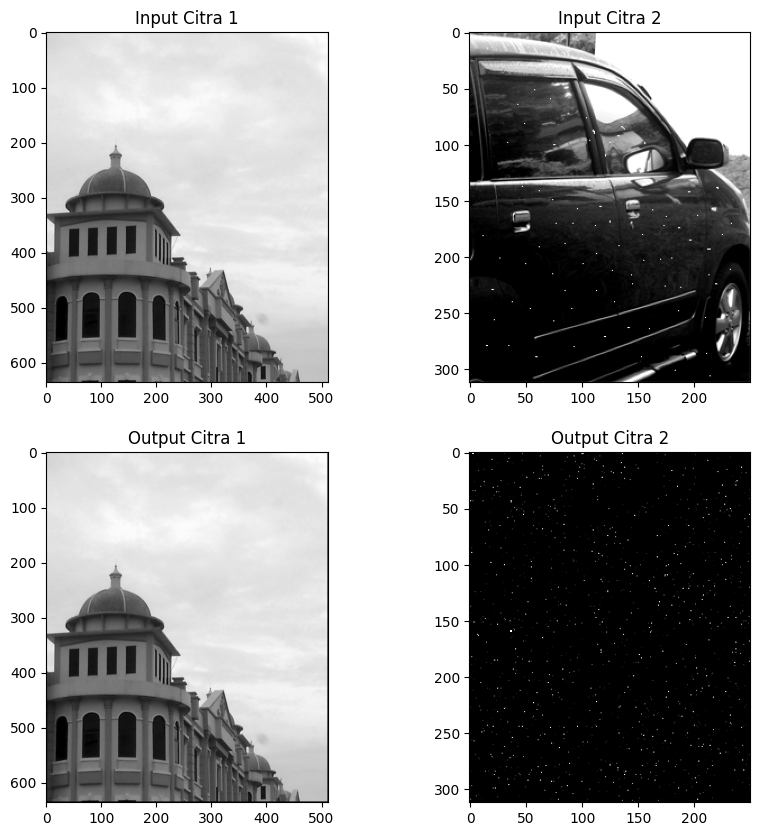

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # Membuat objek gambar dengan 2 baris dan 2 kolom menggunakan subplots, dengan ukuran (10, 10)
ax = axes.ravel()  # Melakukan perataan (flattening) pada objek axes menjadi array 1 dimensi

ax[0].imshow(citra1, cmap='gray')  # Menampilkan citra1 pada sumbu dengan menggunakan cmap 'gray'
ax[0].set_title("Input Citra 1")  # Memberikan judul "Input Citra 1" pada sumbu tersebut

ax[1].imshow(citra2, cmap='gray')  # Menampilkan citra2 pada sumbu dengan menggunakan cmap 'gray'
ax[1].set_title("Input Citra 2")  # Memberikan judul "Input Citra 2" pada sumbu tersebut

ax[2].imshow(output1, cmap='gray')  # Menampilkan output1 pada sumbu dengan menggunakan cmap 'gray'
ax[2].set_title("Output Citra 1")  # Memberikan judul "Output Citra 1" pada sumbu tersebut

ax[3].imshow(output2, cmap='gray')  # Menampilkan output2 pada sumbu dengan menggunakan cmap 'gray'
ax[3].set_title("Output Citra 2")  # Memberikan judul "Output Citra 2" pada sumbu tersebut
